In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando a base
paises = pd.read_csv('dados_paises.csv', index_col= 'country')

In [3]:
#Visualizando a base
paises

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [4]:
#Análise Descritiva
paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Padronização das Variáveis - ZScore 

- Base com variáveis em unidades de medidas diferentes, necessário aplicar a padronização para evitar distorções;

- Aplica-se o ZScore:
> Xi - Xmédia / Desv. Padrao

In [5]:
from sklearn.preprocessing import StandardScaler

#Aplicando ZScore
scaler = StandardScaler()
paises_padrao = pd.DataFrame(scaler.fit_transform(paises))

#Renomeando Colunas
paises_padrao.columns = paises.columns

#Visuzliando a base
paises_padrao

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [6]:
#Todas as variáveis passam a ter média 0 e desvio padrão 1

print('Média Child_mort: ',round(paises_padrao['child_mort'].mean())) , 
print('Desv. Padrão Child_mort: ',round(paises_padrao['child_mort'].std()))

Média Child_mort:  0
Desv. Padrão Child_mort:  1


# K-Means

### Método de Elbow

Analisando a quantidade de clusters ótimo pelo método Elbow

In [7]:
from sklearn.cluster import KMeans

#Aplicando Método Elbow
max_clusters = paises.index.nunique()

K = range(1,166)
sum_sqr = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(paises_padrao)
    sum_sqr.append(model.inertia_)


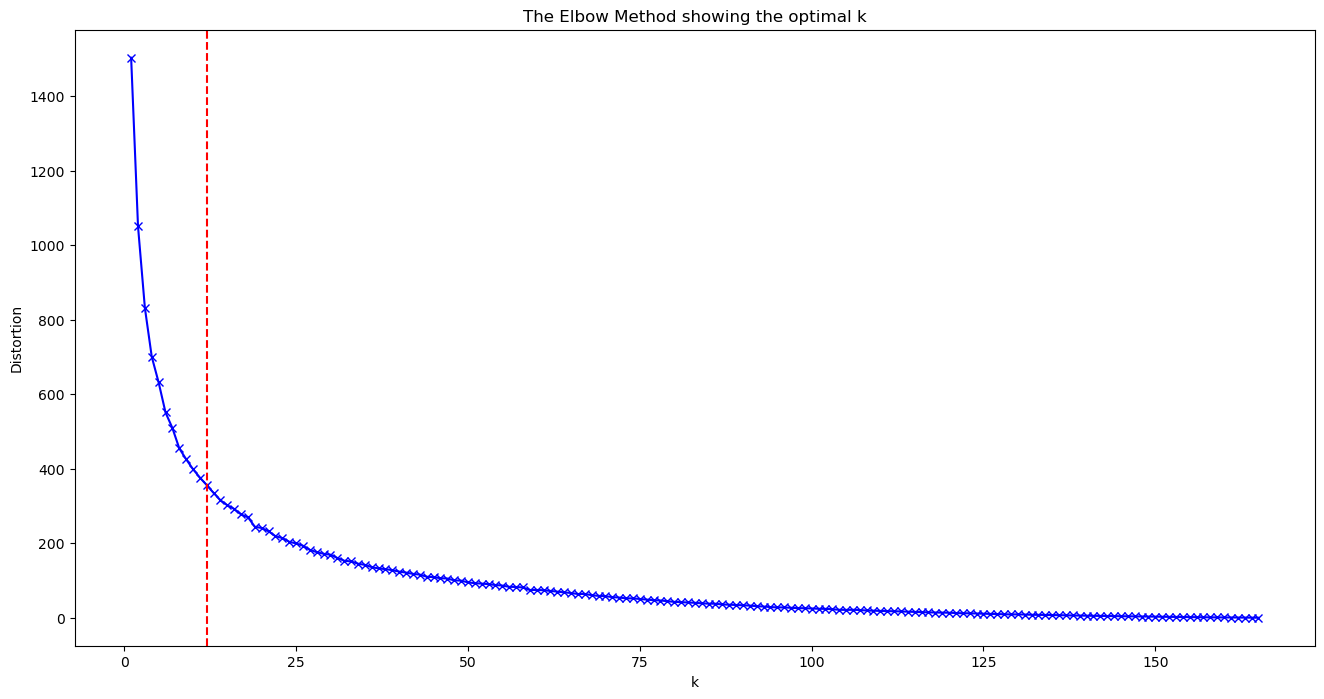

In [8]:
#Gráfico plotando Elbow
plt.figure(figsize=(16,8))
plt.plot(K, sum_sqr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x=12, c='r',ls='--')
plt.show()

### Cluster Hierárquico

Analisando a quantidade de clusters ótimos pelo Método Hierárquico Aglomerativo

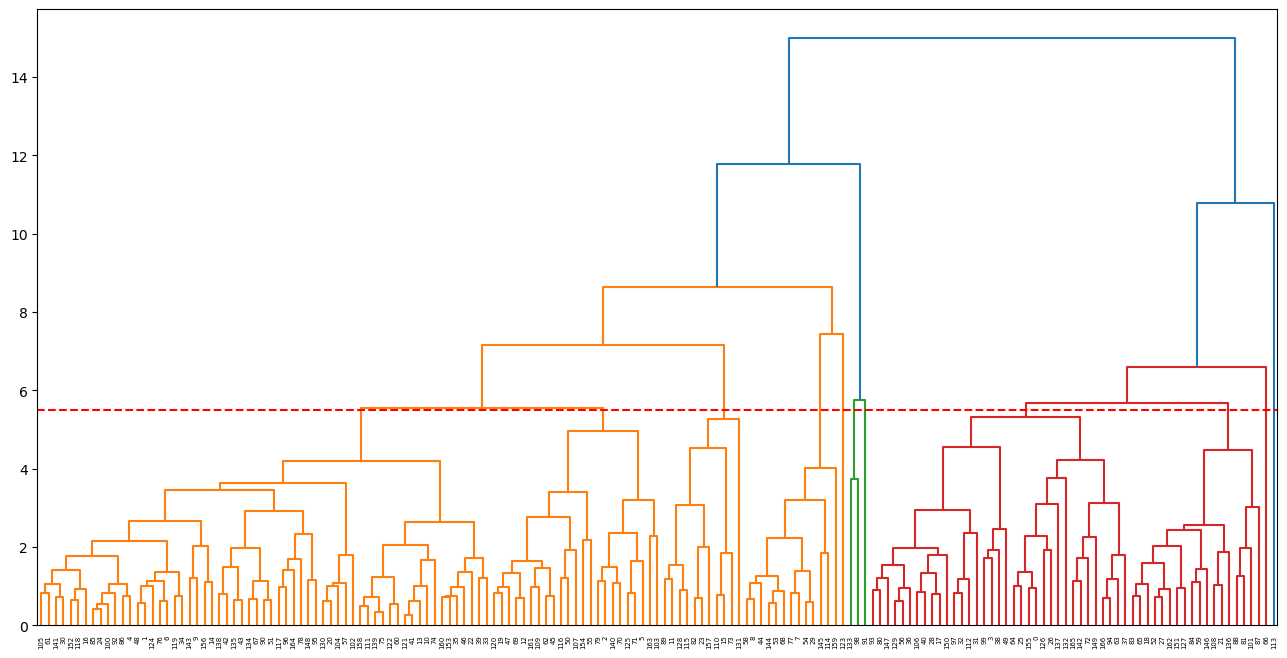

In [9]:
# Matriz de dissimilaridades
import scipy.cluster.hierarchy as shc
#https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

clusters = shc.linkage(paises_padrao, 
            method='complete', 
            metric="euclidean")

plt.figure(figsize=(16,8))
shc.dendrogram(Z=clusters, 
               orientation='top', 
               distance_sort='descending', 
               count_sort='descending',
              )
plt.axhline(y=5.5, c='r',ls='--')
plt.show()

### Aplicando K-Means

In [10]:
#Clusterizando
kmeans = KMeans(n_clusters=12, random_state=0).fit(paises_padrao)

#Aplicando Resultado na base
paises['cluster_K'] = kmeans.labels_

In [11]:
paises = paises.reset_index()
paises = paises.set_index(['cluster_K'])
paises = paises.sort_index(ascending=True)

In [12]:
paises

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_K,,,,,,,,,,
0,New Zealand,6.2,30.30,10.10,28.0,32300,3.730,80.9,2.17,33700
0,France,4.2,26.80,11.90,28.1,36900,1.050,81.4,2.03,40600
0,Germany,4.2,42.30,11.60,37.1,40400,0.758,80.1,1.39,41800
0,Greece,3.9,22.10,10.30,30.7,28700,0.673,80.4,1.48,26900
0,Iceland,2.6,53.40,9.40,43.3,38800,5.470,82.0,2.20,41900
...,...,...,...,...,...,...,...,...,...,...
10,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
10,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170
10,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231


### Análise de Variância de um Fator (ANOVA)

**Identidicar as Variáveis que mais ajudaram na formação dos clusters.**

- Mean Sq do Cluster_H: indica a variabilidade entre grupos
- Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
- F Value: estatística de teste (Sum sq do Cluster_H / Sum Sq dos Resíduals)
- Pr(>F): p-valor da estatística
- p-valor < 0.05: rejeita-se H0 

>**H0:** A variável não é relevante para a separação dos clusters

>**H1:** A variável é relevante para a separação do Cluster

**Objetivo é comparar variabilidade entre os grupos e variabilidade dentro dos grupos** 

Variabilidade entre grupos tem que ser maior do que variabilidade dentro dos grupos, ou seja, os grupos devem ser diferentes entre si para formar clusters bem distintos.

**Estatística F:**
> Variabilidade entre grupos / variabilidade dentro do grupo

ou

> mean_sq (Cluster_H) / mean_sq (Residual)

**A variável mais discriminante dos grupos contém maior estatística F (e significativa: p-valor < 0.05)**

In [13]:
# Referência: https://www.reneshbedre.com/blog/anova.html
from bioinfokit.analys import stat

paises_anova = paises.reset_index()

columns = ['child_mort',
           'exports',
           'health',
           'imports',
           'income',
           'inflation',
           'life_expec',
           'total_fer',
           'gdpp']

for column in paises_anova[columns]:
    res = stat()
    res.anova_stat(df=paises_anova, res_var=column, anova_model=f'{column} ~ C(cluster_K)')
    print(column, end='')
    print(res.anova_summary)
    print()

child_mort                 df         sum_sq       mean_sq          F        PR(>F)
C(cluster_K)   11.0  231040.254228  21003.659475  83.592005  2.412676e-59
Residual      155.0   38945.916071    251.263975        NaN           NaN

exports                 df        sum_sq      mean_sq          F        PR(>F)
C(cluster_K)   11.0  92578.670940  8416.242813  40.567438  4.480599e-40
Residual      155.0  32156.766586   207.463010        NaN           NaN

health                 df      sum_sq    mean_sq          F        PR(>F)
C(cluster_K)   11.0  736.273467  66.933952  20.097723  9.935237e-25
Residual      155.0  516.215829   3.330425        NaN           NaN

imports                 df        sum_sq     mean_sq          F        PR(>F)
C(cluster_K)   11.0  63095.583427  5735.96213  25.998058  6.706205e-30
Residual      155.0  34197.713507   220.63041        NaN           NaN

income                 df        sum_sq       mean_sq          F        PR(>F)
C(cluster_K)   11.0  5.120340e+1